In [ ]:
!pip install gdown

In [1]:
import gdown
import zipfile
import os
import random
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

from PIL import Image
from shutil import copy2
from sklearn.model_selection import train_test_split
from google.colab import files, drive
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator



In [2]:
# https://drive.google.com/file/d/1vgsdMBrzc8F0D3MRFGNo_UoORmfg60aZ/view?usp=sharing

# !wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1vgsdMBrzc8F0D3MRFGNo_UoORmfg60aZ' -O dataset-batik-lite.zip
# zip_path = '/content/dataset-batik-lite.zip'

gdown.download(f'https://drive.google.com/uc?id=1vgsdMBrzc8F0D3MRFGNo_UoORmfg60aZ', '/content/', quiet=False)

# # Mount Google Drive
# drive.mount('/content/drive')

# # Path ke dataset di Google Drive
# zip_path = '/content/drive/My Drive/dataset-batik-lite.zip'

--2024-06-01 15:46:35--  https://docs.google.com/uc?export=download&id=1vgsdMBrzc8F0D3MRFGNo_UoORmfg60aZ
Resolving docs.google.com (docs.google.com)... 172.217.12.14, 2607:f8b0:4025:815::200e
Connecting to docs.google.com (docs.google.com)|172.217.12.14|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1vgsdMBrzc8F0D3MRFGNo_UoORmfg60aZ&export=download [following]
--2024-06-01 15:46:35--  https://drive.usercontent.google.com/download?id=1vgsdMBrzc8F0D3MRFGNo_UoORmfg60aZ&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.65.97, 2607:f8b0:4025:804::2001
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.65.97|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2434 (2.4K) [text/html]
Saving to: ‘dataset-batik-lite.zip’

dataset-batik-lite. 100%[===================>]   2.38K  --.-KB/s    in 0s      

2024-06-01 

In [ ]:
# Extract the dataset
zip_ref = zipfile.ZipFile('/content/dataset-batik-lite.zip', 'r')
zip_ref.extractall('/tmp/dataset')
zip_ref.close()


In [ ]:
# Define Directories for Dataset
base_dir = '/tmp/dataset/dataset-batik-lite'

train_dir = 'data/train'
val_dir = 'data/val'
test_dir = 'data/test'

# Create directories for train, val, and test
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Get all class names (folder names)
classes = [d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))]

# Create class directories in train, val, and test folders
for cls in classes:
    os.makedirs(os.path.join(train_dir, cls), exist_ok=True)
    os.makedirs(os.path.join(val_dir, cls), exist_ok=True)
    os.makedirs(os.path.join(test_dir, cls), exist_ok=True)

In [ ]:
# Split data
for cls in classes:
    cls_dir = os.path.join(base_dir, cls)
    images = os.listdir(cls_dir)
    images = [img for img in images if os.path.isfile(os.path.join(cls_dir, img))]

    train_imgs, temp_imgs = train_test_split(images, test_size=0.2, random_state=42)
    val_imgs, test_imgs = train_test_split(temp_imgs, test_size=0.5, random_state=42)

    for img in train_imgs:
        copy2(os.path.join(cls_dir, img), os.path.join(train_dir, cls))
    for img in val_imgs:
        copy2(os.path.join(cls_dir, img), os.path.join(val_dir, cls))
    for img in test_imgs:
        copy2(os.path.join(cls_dir, img), os.path.join(test_dir, cls))


In [ ]:
def check_image_shapes(directory):
    shapes = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith(('jpg', 'jpeg', 'png', 'bmp', 'gif')):
                file_path = os.path.join(root, file)
                with Image.open(file_path) as img:
                    shapes.append(img.size)
    return shapes

# # Fungsi untuk menghitung jumlah gambar dalam direktori tertentu
# def count_images(directory):
#     count = 0
#     for root, _, files in os.walk(directory):
#         count += len([file for file in files if file.endswith(('jpg', 'jpeg', 'png', 'bmp', 'gif'))])
#     return count

In [ ]:
# Mengecek shape gambar di training set
train_shapes = check_image_shapes(train_dir)

# Menampilkan shape gambar dalam training set
print(f"Shape gambar dalam training set: {train_shapes[0]}")

Shape gambar dalam training set: (600, 400)


In [ ]:
train_datagen = ImageDataGenerator(
      rescale = 1./255,
	    # rotation_range=40,
      # width_shift_range=0.2,
      # height_shift_range=0.2,
      # shear_range=0.2,
      # zoom_range=0.2,
      # horizontal_flip=True,
      # fill_mode='nearest'
)

# VALIDATION_DIR = 'data/val'
validation_datagen = ImageDataGenerator(rescale = 1./255)

# TESTING_DIR = 'data/test'
testing_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
	train_dir,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=32
)

validation_generator = validation_datagen.flow_from_directory(
	val_dir,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=32
)

testing_generator = testing_datagen.flow_from_directory(
	test_dir,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=32,
)

Found 1815 images belonging to 20 classes.
Found 228 images belonging to 20 classes.
Found 233 images belonging to 20 classes.


In [ ]:
# # Menggunakan Transfer Learning
# base_model = tf.keras.applications.VGG16(include_top=False, weights='imagenet', input_shape=(128,128,3))
# base_model.trainable = False

In [ ]:
# model = tf.keras.Sequential([
#             # Note the input shape is the desired size of the image 128x128 with 3 bytes color
#             # This is the first convolution
#             base_model,
#             tf.keras.layers.Conv2D(filters=32, padding='same', kernel_size=3, activation='relu', strides=1),
#             tf.keras.layers.MaxPooling2D(2,2),
#             tf.keras.layers.Dropout(0.5),

#             tf.keras.layers.Flatten(),
#             tf.keras.layers.Dense(20, activation='softmax')
# ])

# model.summary()

In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    # tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    # tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # # The fifth convolution
    # tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    # tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(20, activation='softmax')
])

# Print the model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_12 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 17, 17, 128)      

In [ ]:
# Set the training parameters
model.compile(loss = 'categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

In [ ]:
# from tensorflow.keras.callbacks import Callback
# class EarlyStoppingByValAcc(Callback):
#     def __init__(self, monitor='val_accuracy', value=0.9, verbose=1):
#         super(Callback, self).__init__()
#         self.monitor = monitor
#         self.value = value
#         self.verbose = verbose

#     def on_epoch_end(self, epoch, logs={}):
#         current = logs.get(self.monitor)
#         if current is not None:
#             if current > self.value:
#                 if self.verbose > 0:
#                     print(f"Epoch {epoch+1}: early stopping threshold reached. {self.monitor} = {current}")
#                 self.model.stop_training = True

# # Inisialisasi callback
# early_stopping_callback = EarlyStoppingByValAcc(monitor='val_accuracy', value=0.9, verbose=1)

In [ ]:
# Train the model
history = model.fit(train_generator, epochs=10, validation_data = validation_generator, verbose = 1)

Epoch 1/10
57/57 [==============================] - 106s 2s/step - loss: 2.6211 - accuracy: 0.1620 - val_loss: 1.9790 - val_accuracy: 0.4430
Epoch 2/10
57/57 [==============================] - 105s 2s/step - loss: 1.3414 - accuracy: 0.5840 - val_loss: 0.8607 - val_accuracy: 0.6886
Epoch 3/10
57/57 [==============================] - 106s 2s/step - loss: 0.6260 - accuracy: 0.8231 - val_loss: 0.4525 - val_accuracy: 0.8728
Epoch 4/10
57/57 [==============================] - 106s 2s/step - loss: 0.3075 - accuracy: 0.9477 - val_loss: 0.2208 - val_accuracy: 0.9693
Epoch 5/10
57/57 [==============================] - 103s 2s/step - loss: 0.1532 - accuracy: 0.9851 - val_loss: 0.1352 - val_accuracy: 0.9868
Epoch 6/10
57/57 [==============================] - 105s 2s/step - loss: 0.2257 - accuracy: 0.9267 - val_loss: 0.3394 - val_accuracy: 0.8991
Epoch 7/10
57/57 [==============================] - 106s 2s/step - loss: 0.0956 - accuracy: 0.9890 - val_loss: 0.0739 - val_accuracy: 0.9868
Epoch 8/10
57

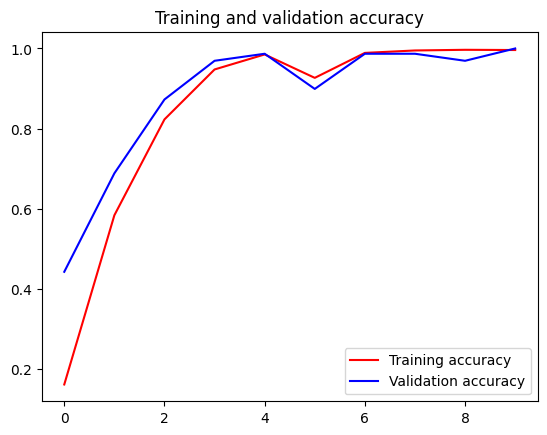

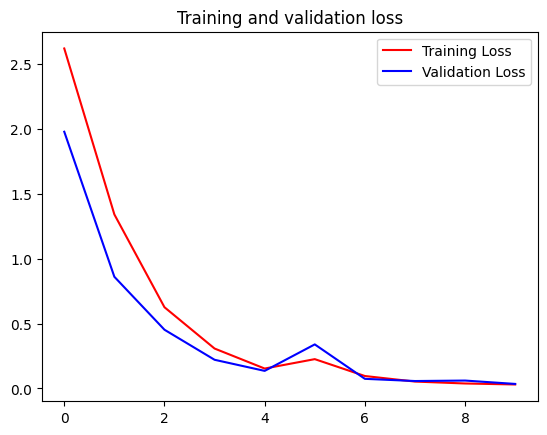

In [ ]:
# Plot the chart for accuracy and loss on both training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Melakukan Prediksi
predictions = model.predict(testing_generator)
test_loss, test_accuracy = model.evaluate(testing_generator)
print(f'Test Accuracy: {test_accuracy}')

8/8 [==============================] - 4s 478ms/step - loss: 0.0282 - accuracy: 1.0000
Test Accuracy: 1.0


In [ ]:
# Mendapatkan nama kelas dari generator
class_indices = train_generator.class_indices
# Membalikkan dictionary untuk mendapatkan nama kelas dari indeks
labels = {v: k for k, v in class_indices.items()}

# Mengambil label asli dari testing_generator
true_classes = testing_generator.classes
# Mendapatkan nama kelas dari label asli
true_labels = [labels[i] for i in true_classes]

# Mendapatkan nama file dari testing_generator
filenames = testing_generator.filenames

for i, pred in enumerate(predictions):
    # Membulatkan nilai probabilitas menjadi 3 angka di belakang koma
    rounded_classes = np.round(pred, 3)

    # Mendapatkan indeks kelas dengan prediksi tertinggi
    predicted_class_index = np.argmax(pred)
    predicted_class_label = labels[predicted_class_index]

    # Mendapatkan label asli dari indeks
    true_label = true_labels[i]

    print(f"File: {filenames[i]}")
    print(f"True class: {true_label}")
    print(f"Predicted class: {predicted_class_label} (index: {predicted_class_index})")
    print(f"Prediction probabilities: {rounded_classes}")
    print()

File: 1/1-100.jpg
True class: 1
Predicted class: 20 (index: 12)
Prediction probabilities: [0.    0.003 0.    0.    0.    0.    0.    0.    0.    0.023 0.    0.
 0.973 0.    0.    0.    0.    0.    0.    0.   ]

File: 1/1-113.jpg
True class: 1
Predicted class: 17 (index: 8)
Prediction probabilities: [0.    0.    0.    0.006 0.    0.    0.    0.    0.99  0.    0.    0.
 0.    0.    0.    0.    0.    0.003 0.    0.   ]

File: 1/1-116.jpg
True class: 1
Predicted class: 3 (index: 13)
Prediction probabilities: [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.001
 0.    0.993 0.    0.    0.005 0.    0.    0.   ]

File: 1/1-23.jpg
True class: 1
Predicted class: 11 (index: 2)
Prediction probabilities: [0.    0.    0.996 0.    0.    0.001 0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.004 0.   ]

File: 1/1-39.jpg
True class: 1
Predicted class: 13 (index: 4)
Prediction probabilities: [0.    0.    0.    0.    0.999 0.    0.    0.    0.    0.    0.    0.



---



---



In [ ]:
# uploaded = files.upload()

# # Mendapatkan nama kelas dari generator
# class_indices = train_generator.class_indices
# # Membalikkan dictionary untuk mendapatkan nama kelas dari indeks
# labels = {v: k for k, v in class_indices.items()}

# for fn in uploaded.keys():

#   # predicting images
#   path = fn
#   img = load_img(path, target_size=(150, 150))
#   x = img_to_array(img)
#   x = np.expand_dims(x, axis=0)

#   images = np.vstack([x])
#   classes = model.predict(images, batch_size=32)

#   # Membulatkan nilai probabilitas menjadi 3 angka di belakang koma
#   rounded_classes = np.round(classes, 3)

#   # Mendapatkan indeks kelas dengan prediksi tertinggi
#   predicted_class_index = np.argmax(classes)
#   predicted_class_label = labels[predicted_class_index]

#   print(f"File: {fn}")
#   print(f"Predicted class: {predicted_class_label} (index: {predicted_class_index})")
#   print(f"Prediction probabilities: {rounded_classes}")

In [ ]:
# # Mendapatkan label kelas dari generator
# class_indices = testing_generator.class_indices
# # Membalikkan dictionary untuk mendapatkan label dari indeks
# labels = {v: k for k, v in class_indices.items()}

# # Fungsi untuk menampilkan gambar dan prediksinya
# def display_image_with_prediction(image_batch, prediction):
#     plt.imshow(image_batch[0])
#     plt.title(f"Predicted: {labels[np.argmax(prediction)]}")
#     plt.axis('off')
#     plt.show()

# # Menampilkan beberapa gambar beserta prediksinya
# for i in range(5):  # Menampilkan 5 gambar pertama
#     image_batch, label_batch = next(testing_generator)
#     prediction = predictions[i]
#     display_image_with_prediction(image_batch, prediction)

In [ ]:
# # Mendapatkan label kelas dari generator
# class_indices = testing_generator.class_indices
# # Membalikkan dictionary untuk mendapatkan label dari indeks
# labels = {v: k for k, v in class_indices.items()}

# # Fungsi untuk menampilkan grid gambar dan prediksinya
# def display_images_with_predictions(image_batches, predictions, true_labels, labels, num_images=5, img_size=(150, 150)):
#     plt.figure(figsize=(10, 10))
#     for i in range(num_images):
#         plt.subplot(5, 5, i + 1)
#         img = image_batches[i]
#         img_resized = tf.keras.preprocessing.image.array_to_img(img).resize(img_size)
#         plt.imshow(img_resized)
#         predicted_label = labels[np.argmax(predictions[i])]
#         true_label = labels[true_labels[i]]
#         plt.title(f"Pred: {predicted_label}\nTrue: {true_label}", fontsize=8)
#         plt.axis('off')
#     plt.show()

# # Mengumpulkan gambar dan prediksi dari generator
# image_batches = []
# predictions = []
# true_labels = []

# for i in range(5):  # Mengumpulkan 5 gambar dan prediksi
#     image_batch, label_batch = next(testing_generator)
#     image_batches.extend(image_batch)
#     true_labels.extend(np.argmax(label_batch, axis=1))
#     preds = model.predict(image_batch)
#     predictions.extend(preds)

# # Menampilkan gambar dan prediksi
# display_images_with_predictions(image_batches, predictions, true_labels, labels)